In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff

# Função de remoção de outliers

In [105]:
def outliers_indexes(df, ft):
    """ 
    Função que retorna o índice dos outliers
    Embasamento matemático:
    Amplitude Interquartil => IQR = Quartil_3 - Quartil_1
    Limite Inferior => LI = Quartil_1 - 1.5*IQR
    Limite Superior => LS = Quartil_3 + 1.5*IQR
    Todos os dados que estiverem acima do limite superior ou abaixo do limite inferior, são outliers
    """
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    LI = Q1 - 1.5*IQR
    LS = Q3 + 1.5*IQR
    
    lista_indices = df.index[ (df[ft] < LI) | (df[ft] > LS) ]
    
    return lista_indices


# Cria-se uma lista vazia para armazenar os índices de saídas de múltiplas colunas 
# (somente caso se quisesse tirar outliers de multiplas colunas)

def outliers_index_l(df):
    index_list = []
    for feature in ["Preço", "TotalReviews"]:
        index_list.extend(outliers_indexes(df, feature))
    outliers_index_list = outliers_indexes(df, 'Preço')
    print("Quantidade de outliers: ",len(outliers_index_list))
    
    return outliers_index_list
    
    
def remove_outliers(df, index_list):
    index_list = sorted(set(index_list))
    # Drop dos outliers
    df = df.drop(index_list)
    return df

# Dados amazon

In [106]:
dados_amazon = pd.read_csv('amazon/output/dados_amazon.csv')
dados_amazon_new = pd.read_csv('amazon/output/dados_amazon.csv').drop(columns=['Estrelas','Url'])

# Dados Americanas

In [107]:
dados_americanas = pd.read_csv('americanas/output/dados_completos_americanas.csv',sep=';')
dados_americanas_new = dados_americanas.drop(columns=['Modelo','Url'])
dados_americanas_new['Categoria'].loc[dados_americanas_new['Categoria'] == 'Televisão'] = 'TV'
dados_americanas_new[dados_americanas_new["Categoria"] == "TV"]

# Dados Casas Bahia

In [109]:
dados_casas_bahia = pd.read_csv('casas_bahia/output/dados_casas_bahia.csv', sep=';')
dados_casas_bahia_new = dados_casas_bahia.drop(columns=['Estrelas'])
dados_casas_bahia_new['Categoria'].loc[dados_casas_bahia_new['Categoria'] == 'Smart TV'] = 'TV'
dados_casas_bahia_new[dados_casas_bahia_new["Categoria"] == "TV"]

In [111]:
outliers_index_list_cb = outliers_index_l(dados_casas_bahia_new)
df_clean_cb = remove_outliers(dados_casas_bahia_new, outliers_index_list_cb)

Quantidade de outliers:  55


# Dados Magazine Luiz

In [112]:
dados_ml = pd.read_csv('magazine_luiza/output/dados_magazine_luiza.csv',sep=';')
dados_ml_new = dados_ml.drop(columns=['Estrelas','URL'])
dados_ml_new['Categoria'].loc[dados_ml_new['Categoria'] == 'Smart TV'] = 'TV'
dados_ml_new[dados_ml_new["Categoria"] == "TV"]

,Descrição,Preço,TotalReviews,Loja,Categoria
267,Smart TV 50” Crystal 4K Samsung 50AU7700,3099.00,28,Megazine Luiza,TV
268,Smart TV 65” Crystal 4K Samsung 65AU7700 Wi-Fi,4199.00,3,Megazine Luiza,TV
269,Smart TV 55” Crystal 4K Samsung 55AU7700,3299.00,2,Megazine Luiza,TV
270,Smart TV 60” Crystal 4K Samsung 60AU8000 Wi-Fi,3989.05,3,Megazine Luiza,TV
271,Smart TV 32” HD LED TCL S615 VA 60Hz,1398.00,4,Megazine Luiza,TV
...,...,...,...,...,...
524,Smart Tv 40S615 40 Polegadas Led Full Hd Hdr W...,2126.91,0,Megazine Luiza,TV
525,Smart TV LED 32'' HD LG 32LM627B 2021 WiFi Blu...,1859.07,0,Megazine Luiza,TV
526,"Smart TV Samsung Crystal UHD TU8000 4K 82"", Bo...",8799.00,2,Megazine Luiza,TV
527,"Smart TV Samsung 32"" LED HD UN32T4300",1699.00,2,Megazine Luiza,TV


# Dataframe Geral

In [113]:
dados_gerais = pd.concat([dados_amazon_new, dados_americanas_new,df_clean_cb,dados_ml_new])
dados_gerais.reset_index(drop=True, inplace=True)
dados_gerais

,Descrição,Preço,TotalReviews,Loja,Categoria
0,"Notebook Lenovo Ultrafino IdeaPad S145, AMD Ry...",2909.00,199.0,Amazon,Notebook
1,Notebook Lenovo Ultrafino ideapad S145 i5-1035...,3229.99,26.0,Amazon,Notebook
2,SAMSUNG Chromebook SS 11.6 Intel DC 4GB 32GB X...,1699.00,239.0,Amazon,Notebook
3,"Samsung BookIntel® Core™ i3-1115G4, 11 Geração...",2789.09,46.0,Amazon,Notebook
4,Notebook Positivo Motion Q464C Intel® Atom® Qu...,1718.90,72.0,Amazon,Notebook
...,...,...,...,...,...
3986,Geladeira/Refrigerador Samsung Frost Free,3324.05,0.0,Megazine Luiza,Geladeira
3987,Geladeira Brastemp Frost Free Duplex 500 litro...,5571.00,0.0,Megazine Luiza,Geladeira
3988,Geladeira Frost Free Midea MD-RT453FGA041 425L...,2951.10,0.0,Megazine Luiza,Geladeira
3989,Geladeira panasonic bb53 branca 425l 127v,3199.45,0.0,Megazine Luiza,Geladeira


# Criando notebook de marcas

In [114]:
dados_gerais_marcas = dados_gerais.copy()
dados_gerais_marcas

,Descrição,Preço,TotalReviews,Loja,Categoria
0,"Notebook Lenovo Ultrafino IdeaPad S145, AMD Ry...",2909.00,199.0,Amazon,Notebook
1,Notebook Lenovo Ultrafino ideapad S145 i5-1035...,3229.99,26.0,Amazon,Notebook
2,SAMSUNG Chromebook SS 11.6 Intel DC 4GB 32GB X...,1699.00,239.0,Amazon,Notebook
3,"Samsung BookIntel® Core™ i3-1115G4, 11 Geração...",2789.09,46.0,Amazon,Notebook
4,Notebook Positivo Motion Q464C Intel® Atom® Qu...,1718.90,72.0,Amazon,Notebook
...,...,...,...,...,...
3986,Geladeira/Refrigerador Samsung Frost Free,3324.05,0.0,Megazine Luiza,Geladeira
3987,Geladeira Brastemp Frost Free Duplex 500 litro...,5571.00,0.0,Megazine Luiza,Geladeira
3988,Geladeira Frost Free Midea MD-RT453FGA041 425L...,2951.10,0.0,Megazine Luiza,Geladeira
3989,Geladeira panasonic bb53 branca 425l 127v,3199.45,0.0,Megazine Luiza,Geladeira


In [115]:
modelos = ["lenovo", "positivo", "samsung", "dell", "acer", "apple", "xiaomi", "motorola", "asus","sony","tcl","philips","lg","philco" ]
count = 0
dados_gerais_marcas["Marca"] = np.NaN

for index, row in dados_gerais_marcas.iterrows():
    for modelo in modelos:
        if modelo in row["Descrição"].lower():
            dados_gerais_marcas.loc[index, "Marca"] = modelo.capitalize()

In [116]:
dados_gerais_marcas.dropna(inplace=True)
dados_gerais_marcas.reset_index(drop=True, inplace=True)
dados_gerais_marcas

,Descrição,Preço,TotalReviews,Loja,Categoria,Marca
0,"Notebook Lenovo Ultrafino IdeaPad S145, AMD Ry...",2909.00,199.0,Amazon,Notebook,Lenovo
1,Notebook Lenovo Ultrafino ideapad S145 i5-1035...,3229.99,26.0,Amazon,Notebook,Lenovo
2,SAMSUNG Chromebook SS 11.6 Intel DC 4GB 32GB X...,1699.00,239.0,Amazon,Notebook,Samsung
3,"Samsung BookIntel® Core™ i3-1115G4, 11 Geração...",2789.09,46.0,Amazon,Notebook,Samsung
4,Notebook Positivo Motion Q464C Intel® Atom® Qu...,1718.90,72.0,Amazon,Notebook,Positivo
...,...,...,...,...,...,...
2547,Geladeira/Refrigerador Inverter 554 Litros Phi...,5264.86,0.0,Megazine Luiza,Geladeira,Philco
2548,Geladeira French Door Eco Inverter Philco Fros...,3952.93,0.0,Megazine Luiza,Geladeira,Philco
2549,Geladeira/Refrigerador Philco Frost Free,7884.05,2.0,Megazine Luiza,Geladeira,Philco
2550,Geladeira/Refrigerador Smart LG Side by Side,17669.05,0.0,Megazine Luiza,Geladeira,Lg


# Analise

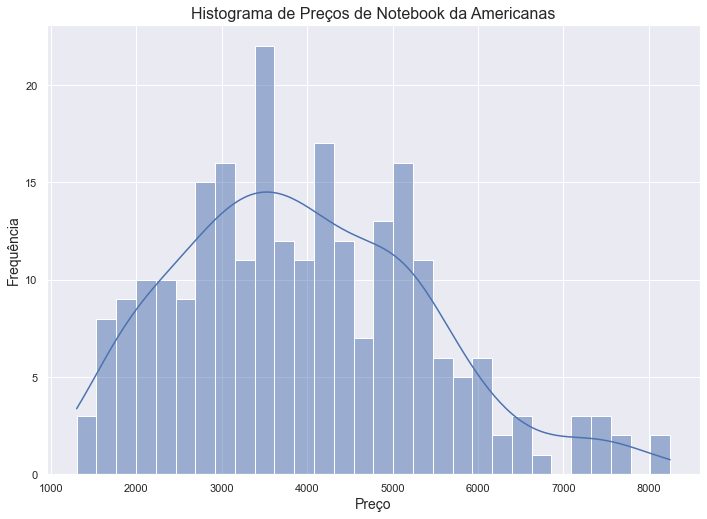

In [117]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
histplot = sns.histplot(data=dados_gerais.query("Categoria == 'Notebook' and Loja == 'Americanas'"), x='Preço', linewidth=1, bins=30, kde=True)
histplot.axes.set_title("Histograma de Preços de Notebook da Americanas", fontsize=16)
histplot.set_xlabel("Preço", fontsize=14)
histplot.set_ylabel("Frequência", fontsize=14)
plt.show()

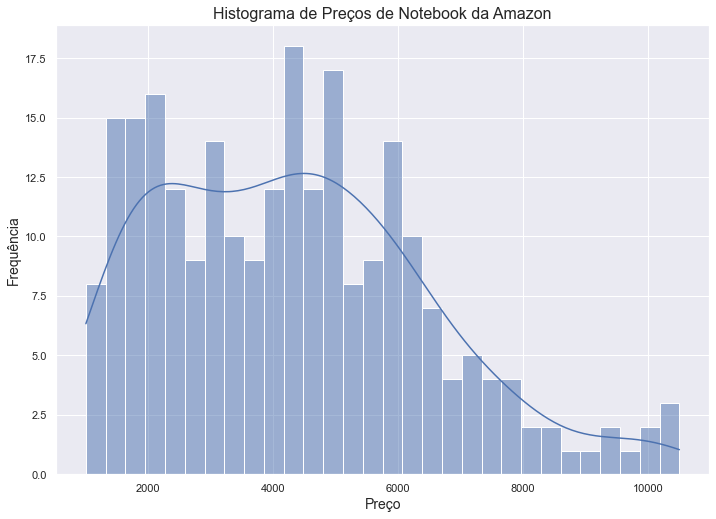

In [118]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
histplot = sns.histplot(data=dados_gerais.query("Categoria == 'Notebook' and Loja == 'Amazon'"), x='Preço', linewidth=1, bins=30, kde=True)
histplot.axes.set_title("Histograma de Preços de Notebook da Amazon", fontsize=16)
histplot.set_xlabel("Preço", fontsize=14)
histplot.set_ylabel("Frequência", fontsize=14)
plt.show()

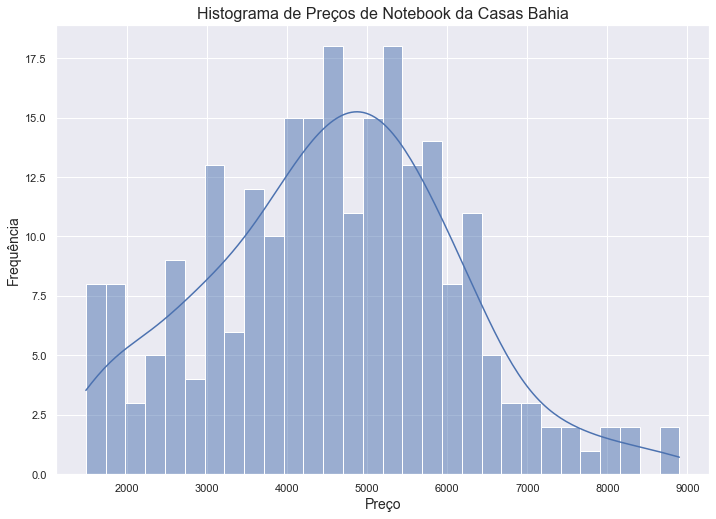

In [119]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
histplot = sns.histplot(data=dados_gerais.query("Categoria == 'Notebook' and Loja == 'Casas Bahia'"), x='Preço', linewidth=1, bins=30, kde=True)
histplot.axes.set_title("Histograma de Preços de Notebook da Casas Bahia", fontsize=16)
histplot.set_xlabel("Preço", fontsize=14)
histplot.set_ylabel("Frequência", fontsize=14)
plt.show()

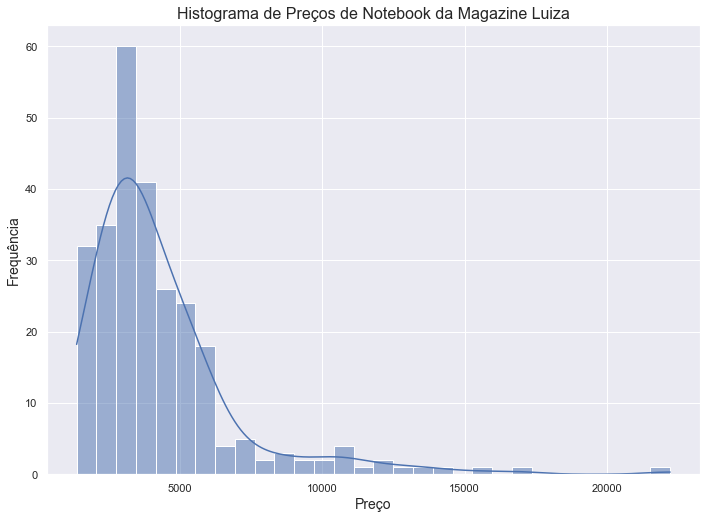

In [120]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
histplot = sns.histplot(data=dados_gerais.query("Categoria == 'Notebook' and Loja == 'Megazine Luiza'"), x='Preço', linewidth=1, bins=30, kde=True)
histplot.axes.set_title("Histograma de Preços de Notebook da Magazine Luiza", fontsize=16)
histplot.set_xlabel("Preço", fontsize=14)
histplot.set_ylabel("Frequência", fontsize=14)
plt.show()

In [121]:
fig = px.box(dados_gerais.query("Categoria == 'Notebook' and Loja == 'Americanas'"), 
             y="Preço", notched=True,title='Boxplot dados de preço dos notebooks na Americanas')
fig.show()

In [122]:
fig = px.box(dados_gerais.query("Categoria == 'Notebook' and Loja == 'Megazine Luiza'"), 
             y="Preço", notched=True,title='Boxplot dados de preço dos notebooks na Americanas')
fig.update_layout
fig.show()

In [123]:
fig = px.box(dados_gerais.query("Categoria == 'Notebook' and Loja == 'Casas Bahia'"), 
             y="Preço", notched=True)
fig.show()

In [60]:
fig = px.box(dados_gerais.query("Categoria == 'Notebook' and Loja == 'Amazon'"), y="Preço", notched=True)
fig.show()